### PREDICTING CUSTOMER CHURN IN TELECOMMUNICATION USING MACHINE LEARNING ALGORITHMS

### A CASE STUDY OF: SYRIA TELCOMMUNICATION COMPANY

### DATA SCIENCE-PHASE 3 PROJECT


### School: Moringa School
### Student Name: Cynthia Dalmas
### Course: Data Science


### INTRODUCTION

- This project entails building a classifier model to predict whether a customer will stop doing business with Syria Tel, a telecommunications company. This is a binary classification problem.

- Most naturally, telecommunication businesses would be interested in reducing how much money is lost when a customers  does not stick around for a long time.

- This project follows a CRISP-DMCross-Industry Standard Process for Data Mining. which is a cyclical process that provides a structured approach to planning, organizing, and implementing a data mining project in the following ways:


*   Business Understanding
*   Data understanding
*   Data preparation
*   Modeling
*   Evaluation
*   Deployment





### BUSINESS UNDERSTANDING AND PROBLEM STATEMENT

Customer churn is a major problem and one of the most important concerns for large telecommunication companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn.

Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn.

Syria Tel Company is nevertheless affected by customer churning as well.

The main contribution of my work is to developing a churn predictive model which assists telecom operators to predict customers who are most likely subject to churn.

The models developed in this project uses machine learning techniques to classify and predict customers who churn as 1 and no churn as 0.

In order to measure the performance of the model, classification metrics such as Precision, recall,F1-Score, the ROC and Area Under Curve (AUC) standard measure is adopted, and the AUC value obtained is 0.85.

**DATA UNDERSTANDING**

The dataset contains call details of 3333 customers with 21 features and a dependent churn parameter with two values: Yes/No.

Some features include information about the number of incoming and outgoing messages and voicemail for each customer.

Some of the columns in the dataset:

1. 'state'- state where he customer belongs
2. 'account length'- length of customer balance
3. 'area code'-customer area code
4. 'phone number'- annonimized customer phone number
5. 'international plan'- whether customer had an international plan
6. 'voice mail plan'- whether customer had an voice mail plan
7. 'number vmail messages'-Number of voice mail messages received
8. 'total day minutes'- Total no of minutes a customer used in the day
9. 'total day calls'-Total no of calls a customer made in the day
10. 'total day charge'-Total charge a customer incurred in the day
11. 'total eve minutes'-Total no of minutes a customer used in the evening
12. 'total eve calls'-Total no of calls a customer made in the eve
13. total eve charge'-Total charge a customer incurred in the eve
14. 'total night minutes'-Total no of minutes a customer used in the evening
15. 'total night calls'-Total no of calls a customer made in the night
16. 'total night charge'--Total charge a customer incurred in the night
17. 'total intl minutes'-Total no of minutes a customer used for an intl call
18. 'total intl calls'-Total no of calls a customer used for an int'l call
19. 'total intl charge'-Total charge a customer incurred for a int'l call
20. 'customer service calls'- Number of times a customer called customer service
21. 'churn'- Whether a customer left of not

### DATA PREPARATION

**Exploratory Data Analysis was done on the following:**

  1. Previewing the data
  2. Descriptive statistics of the data
  3. Renaming columns
  4. Dropping uncessary columns
  3. Checking and handling missing values
  4. Checking for duplicates
  5. Checking the data shape
  6. Checking and handling outliers
  7. Checking for the data class balance
  10. plotting charts histograms,bra graghs,violin charts,pie charts etc to check the distribution of dependent and independent variables
  11. Performing Uni-variate, Bi-variate and Multivariate analysis.

### MODELING

**Five machine learning algorithms were used in this project to predict churn factor:**
1. logistic regression
1. Decision tree
2. Random Forest
3. Support Vector Machine
4. KNN Algorithm
5. Bayes Networks


### MODEL EVALUATION

**Finally, the models are evaluated to check whether the models accomplished their intended tasks, the following metrics are used to assess their effectivenes**

- Accuracy - percentage of the total variables that were correctly classified. Use the formula Accuracy = (TP+TN) / (TP+TN+FP+FN)

- False positive rate - how often the model predicts a positive for a value that is actually negative. Use the formula False Positive Rate = FP / (FP+TN)

- Precision - percentage of positive cases that were true positives as opposed to false positives. Use the formula Precision = TP / (TP+FP)

- Recall - percentage of actual positive cases that were predicted as positives, as opposed to those classified as false negatives. Use the formula Recall = TP/(TP+FN)

- Area under curve - method of visualizing true and false positive rates against each other.


SUMMARY

- EDA, Feature creation by combining features,Data splitting, Hyperparamter tuning & outlier detection, Cross Validation Score were performed.
- Six models were fit on the churning dataset and the best model which is Decision Tree was selected.

**STEP 1: Data loading and inspection**

In [70]:
#loading necessary libraries

# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression, scaler function & Confusion Matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

# Packages for GridSearchCV
from sklearn.model_selection import GridSearchCV

# Packages for Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree

# Packages for KNeighborsClassifier algorithm
from sklearn.neighbors import KNeighborsClassifier

# Packages for Randon forest algorithm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# This function displays the splits of the tree
from sklearn.tree import plot_tree

# Statsmodels is used to create statistical models.
from scipy import stats  # Scientific computing library for statistical tests.
from scipy.stats import f_oneway  # One-way ANOVA statistical test.
from scipy.stats import ttest_ind  # Independent sample t-test for comparing means.
import warnings  # handle warnings during code execution.
warnings.filterwarnings("ignore")  # Ignore warnings to improve code readability.

In [47]:
#loading the dataset
data=pd.read_csv('/content/customer_churn.csv')

#Inspect 4 columns
data.head(4)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [48]:
#checking the shape of the data
data.shape

(3333, 21)

- **The data has a shape of 3333 colmuns and 21 rows**

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- **All the data types are correct and aligns with each columns**

In [6]:
#check decriptive stats
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### STEP 2: Data Cleaning

In [7]:
#check for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

- **The dataset does not contain any missing values**

In [8]:
#Checking for duplicates
data.duplicated().sum()

0

- **The dataset has no duplicates**

In [50]:
#checking all columns names
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [51]:
# Renaming columns as needed
df = data.rename(columns={'account length': 'account_length',
                          'area code' : 'area_code',
                          "phone number" : 'phone_number',
                          'international plan': 'international_plan',
                          'voice mail plan':'voice_mail_plan',
                          'number vmail messages':'number_vmail_messages',
                          'total day minutes':'total_day_minutes',
                          'total day calls':'total_day_calls',
                          'total day charge':'total_day_charge',
                          'total eve minutes':'total_eve_minutes',
                          'total eve calls':'total_eve_calls',
                          'total eve charge':'total_eve_charge',
                          'total night minutes':'total_night_minutes',
                          'total night calls':'total_night_calls',
                          'total night charge':'total_night_charge',
                          'total intl minutes':'total_intl_minutes',
                          'total intl calls':'total_intl_calls',
                           'total intl charge':'total_intl_charge',
                          'customer service calls':'customer_service_calls'
                          })

# Display all column names after the update
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [52]:
#checking the columns names again
df.head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [53]:
#Creating new columns in the dataset
df['total_minutes']=df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']+df['total_intl_minutes']
df['total_charge']=df['total_day_charge']+df['total_eve_charge']+df['total_night_charge']+df['total_intl_charge']
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']+df['total_intl_calls']

In [54]:
#Changing yes and no to 1s and 0s
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] =df['voice_mail_plan'].map({'yes': 1, 'no': 0})

In [55]:
#inspecting the new columns
df.head(3)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge,total_calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333


In [15]:
#dropping columns
df.drop(columns=['total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'],axis=1,inplace=True)
df.head(3)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,total_minutes,total_charge,total_calls
0,KS,128,415,382-4657,0,1,25,1,False,717.2,75.56,303
1,OH,107,415,371-7191,0,1,26,1,False,625.2,59.24,332
2,NJ,137,415,358-1921,0,0,0,0,False,539.4,62.29,333


In [16]:
#Inspecting the columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'customer_service_calls', 'churn', 'total_minutes', 'total_charge',
       'total_calls'],
      dtype='object')

### STEP 3:EXPLORATORY DATA ANALYSIS

In [18]:
#Calculating the  % of International plans
df['international_plan'].value_counts(normalize=True)

international_plan
0    0.90309
1    0.09691
Name: proportion, dtype: float64

- **90% were international plan while 10% were not**

In [19]:
# Calculating the % of voice mail plan
df['voice_mail_plan'].value_counts(normalize=True)

voice_mail_plan
0    0.723372
1    0.276628
Name: proportion, dtype: float64

- **72% were on voice mail plan 28% were not on voice mail plan**

In [20]:
# Calculate % of churn
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

- 86% of the customers churned while 14% did not churn

In [21]:
 #Propotion of calls that churned
 df.groupby('churn')['total_calls'].sum()

churn
False    869002
True     148020
Name: total_calls, dtype: int64

- 14% of total calls churned.

In [22]:
 #Propotion of calls that churned
 df.groupby('churn')['total_charge'].sum()

churn
False    166579.10
True      31566.93
Name: total_charge, dtype: float64

- 19% of customers churned due to charges incurred

**- Check for outliers**

Text(0.5, 1.0, 'Before Removing Outliers')

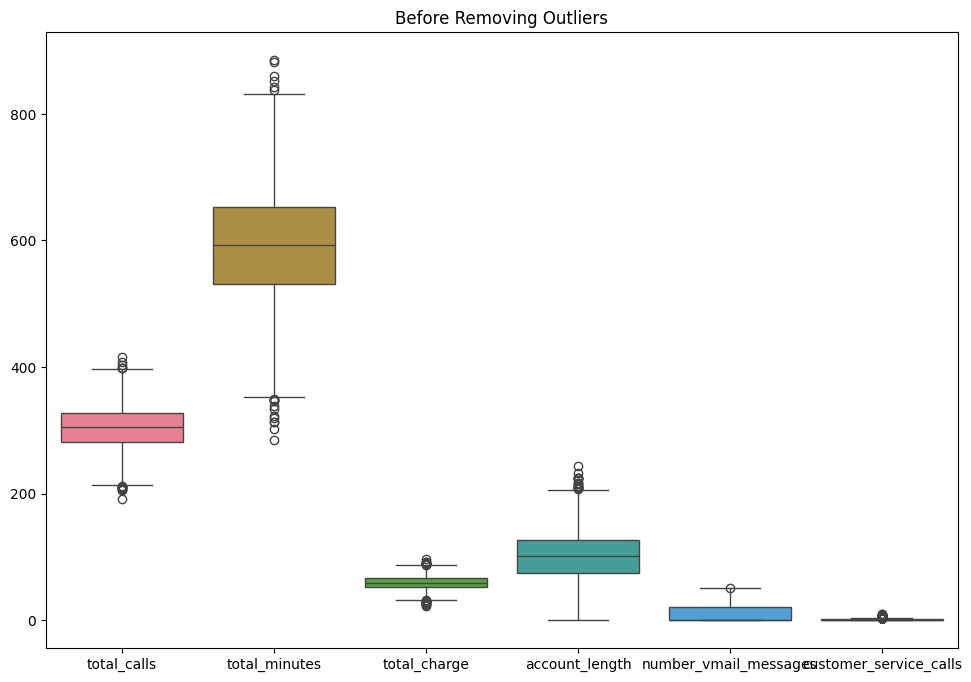

In [23]:
# Checking for outliers in the numerical columns
plt.figure(figsize=(40, 8))
plt.subplot(1,3,3)
sns.boxplot(data=df[['total_calls', 'total_minutes','total_charge','account_length','number_vmail_messages',
                     'customer_service_calls']], palette='husl')
plt.title('Before Removing Outliers')


- Most of the variables have outliers

- It is not advisable to remove outliers in this type of analysis, since an outlier in the experiment could be the reason for churning. But it's appropriate to check for where they occur in the dataset.

In [24]:
#checking for ouliers
'''
def remove_outlier(df_in, col_name):
    q1 = df_in['total_calls'].quantile(0.25)
    q3 = df_in['total_calls'].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit  = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    df_out = df_in.loc[(df_in['total_calls'] > lower_limit) & (df_in['total_calls'] < upper_limit)]
    return df_out
'''

"\ndef remove_outlier(df_in, col_name):\n    q1 = df_in['total_calls'].quantile(0.25)\n    q3 = df_in['total_calls'].quantile(0.75)\n    iqr = q3-q1 #Interquartile range\n    lower_limit  = q1-1.5*iqr\n    upper_limit = q3+1.5*iqr\n    df_out = df_in.loc[(df_in['total_calls'] > lower_limit) & (df_in['total_calls'] < upper_limit)]\n    return df_out\n"

array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'area_code'}>,
        <Axes: title={'center': 'international_plan'}>],
       [<Axes: title={'center': 'voice_mail_plan'}>,
        <Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'customer_service_calls'}>],
       [<Axes: title={'center': 'total_minutes'}>,
        <Axes: title={'center': 'total_charge'}>,
        <Axes: title={'center': 'total_calls'}>]], dtype=object)

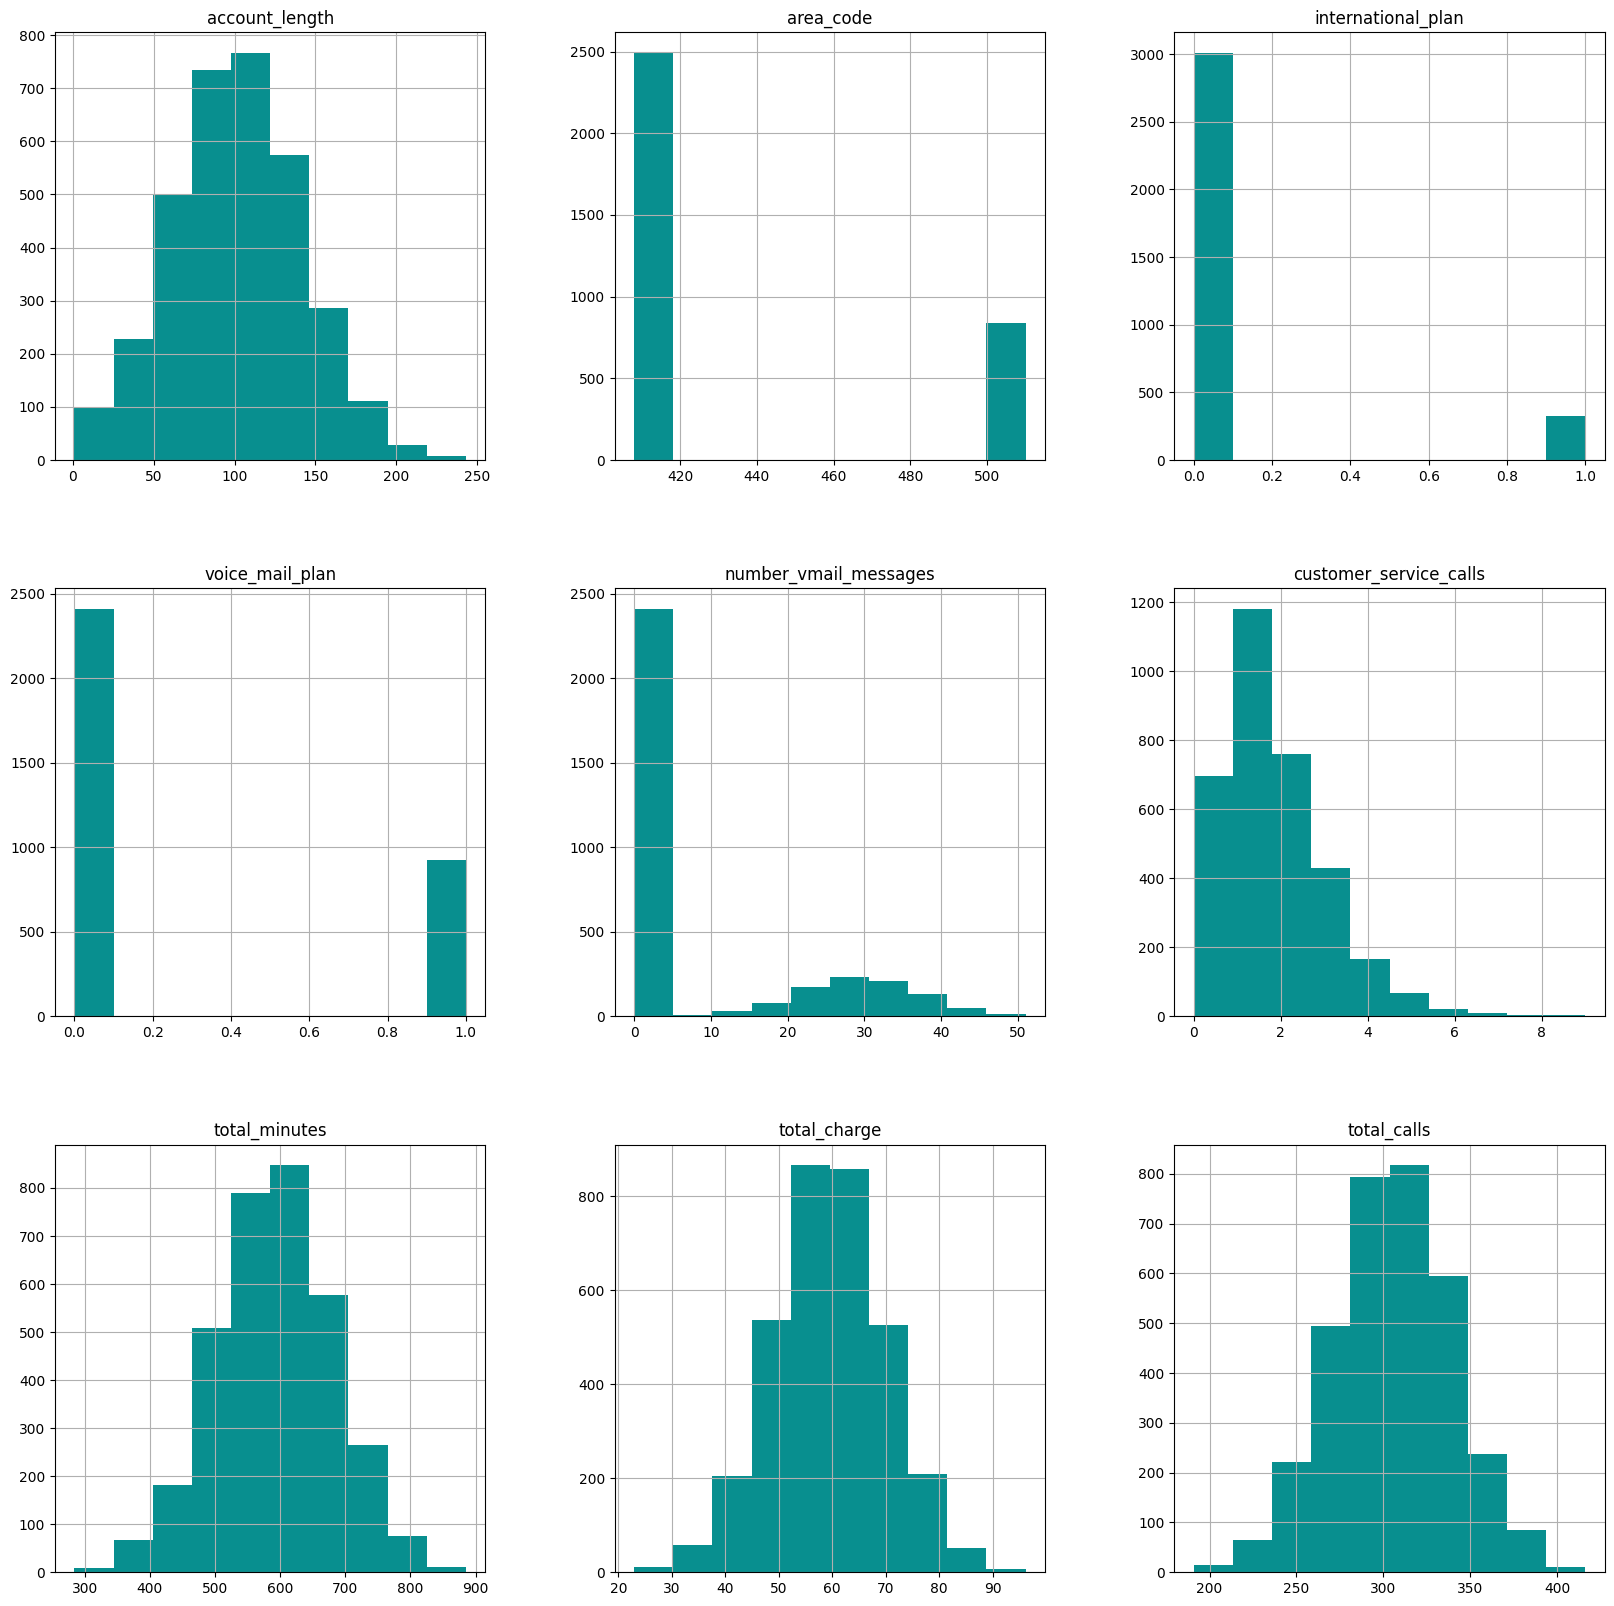

In [25]:
# A histogram to chech the distribution of each column.
df.hist(figsize=(20,20), color='#088f8f')

- Most variable have a normal type of distribution

Text(0.5, 1.0, 'Pair plot for the variables')

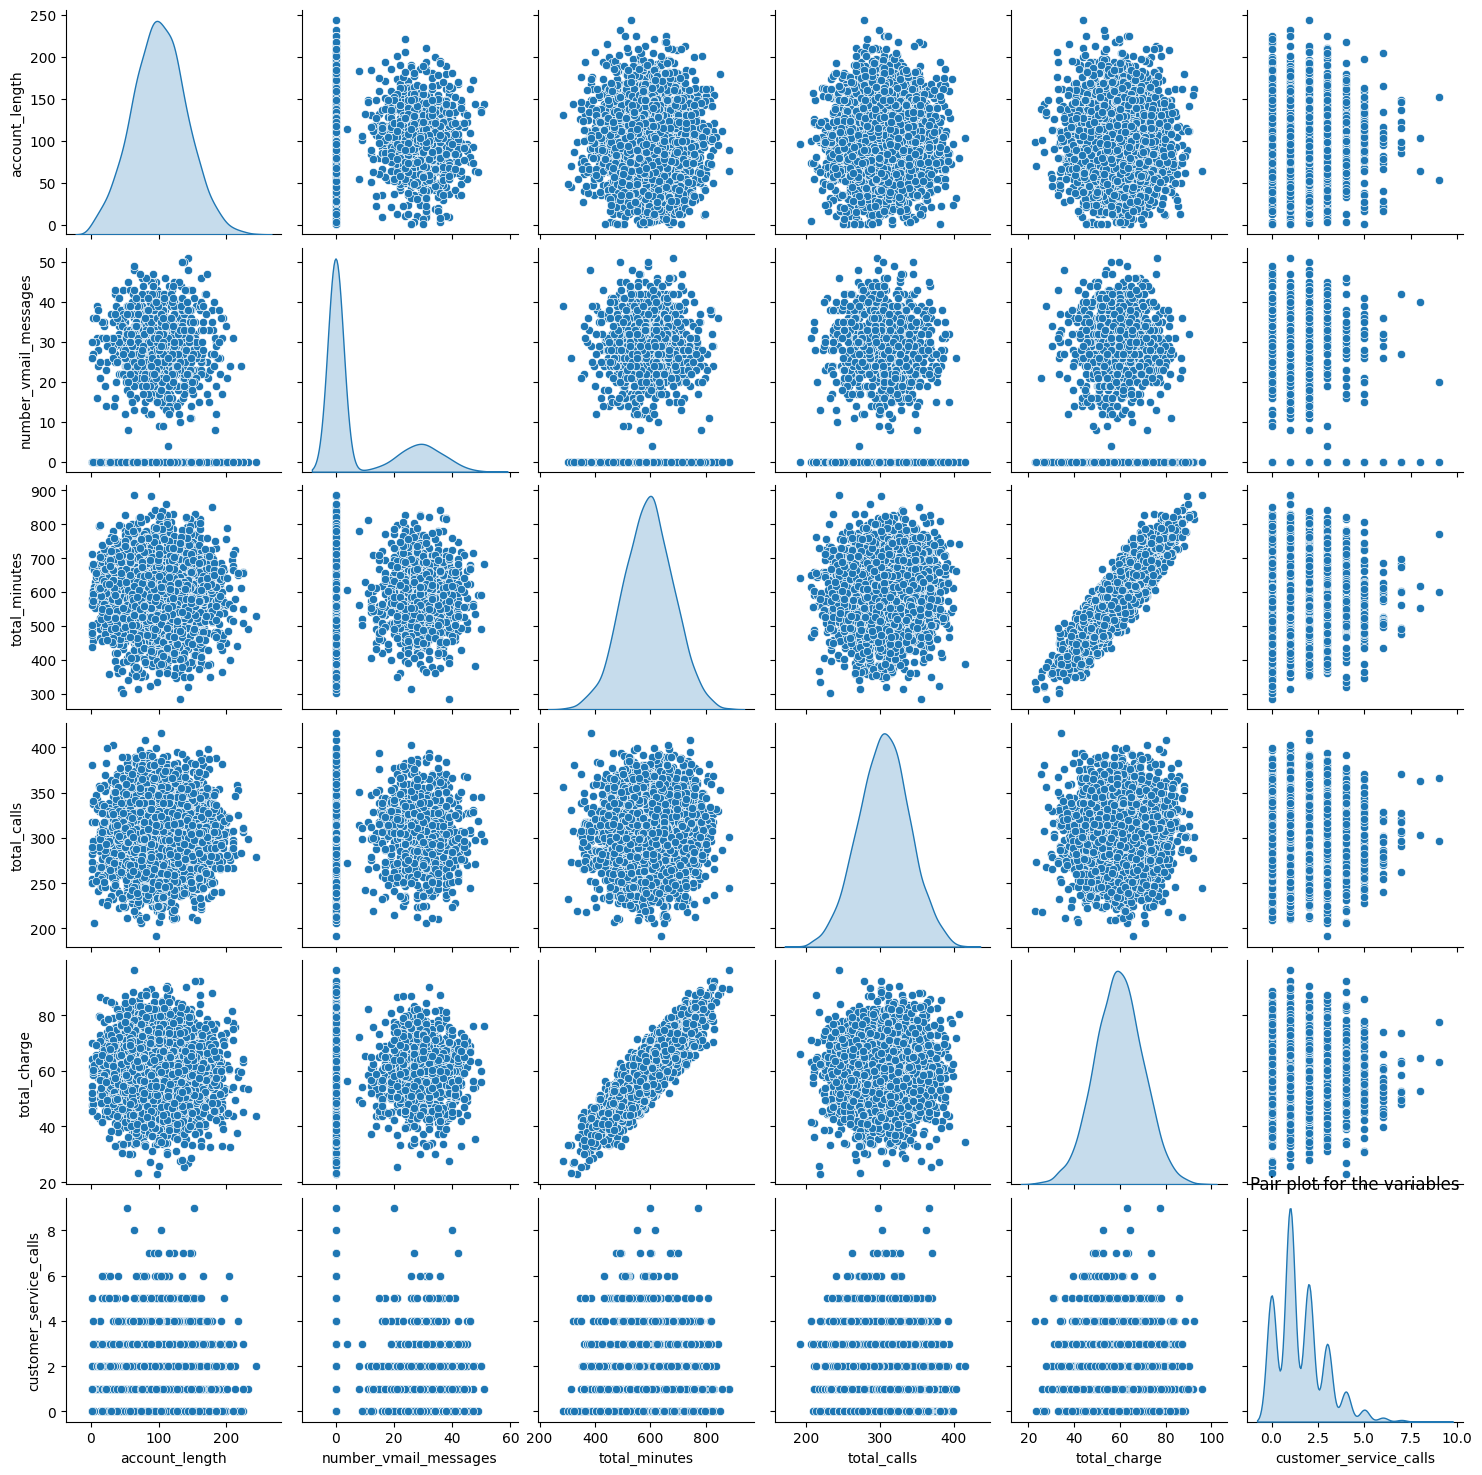

In [26]:
# Viewing the relationship amongst variables using a pair plot
sns.pairplot(df[['account_length','number_vmail_messages','total_minutes','total_calls','total_charge',
                 'customer_service_calls']],diag_kind='kde',)
plt.title('Pair plot for the variables')


- Most of the variables are proving to have high multicolinearity.
- We will have to drop the columns with multicolinearity.

Text(0.5, 1.0, 'Account vs churn')

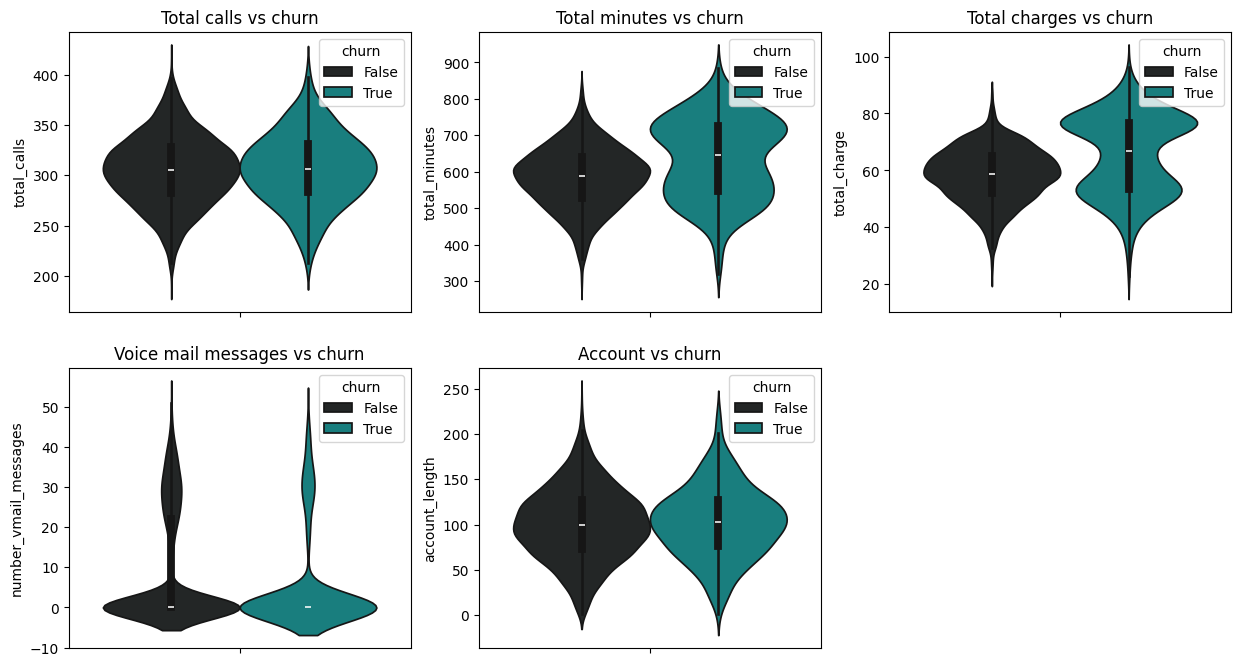

In [28]:
#Violin plot for variables to show the distribution of calls,minutes,chrage,voice mail messages with respect to a customer churning
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.violinplot(y='total_calls', data=df, hue='churn', color='#088f8f')
plt.title('Total calls vs churn')

plt.subplot(2, 3, 2)
sns.violinplot(y='total_minutes', data=df, hue='churn', color='#088f8f')
plt.title('Total minutes vs churn')

plt.subplot(2, 3, 3)
sns.violinplot(y='total_charge', data=df, hue='churn', color='#088f8f')
plt.title('Total charges vs churn')

plt.subplot(2, 3, 4)
sns.violinplot(y='number_vmail_messages', data=df, hue='churn', color='#088f8f')
plt.title('Voice mail messages vs churn')

plt.subplot(2, 3, 5)
sns.violinplot(y='account_length', data=df, hue='churn', color='#088f8f')
plt.title('Account vs churn')

- Majority of customers who churned had higher charges for day calls than night calls, this can also mean that they used their telephones alot during the day

- Majority of customers who churned had fewer voice mail messages.

- Account length of anout 100 had high numbers of customers who churned.



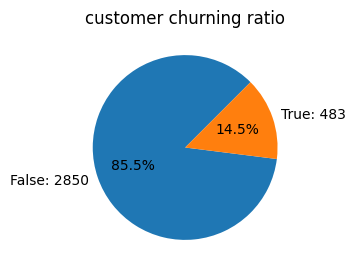

In [29]:
# Pie chart to show % of  customer churn
fig = plt.figure(figsize=(3,3))
data=df['churn'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%',startangle=45
        )
plt.title('customer churning ratio');

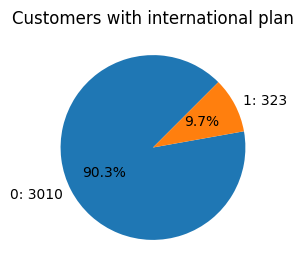

In [30]:
# Pie chart to show % of customers  with international plan
fig = plt.figure(figsize=(3,3))
data=df['international_plan'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%',startangle=45
        )
plt.title('Customers with international plan');

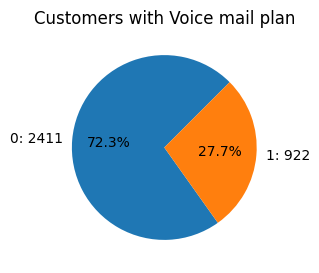

In [31]:
# Pie chart to customer with voice mail plan
fig = plt.figure(figsize=(3,3))
data=df['voice_mail_plan'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%', startangle=45
        )
plt.title('Customers with Voice mail plan');

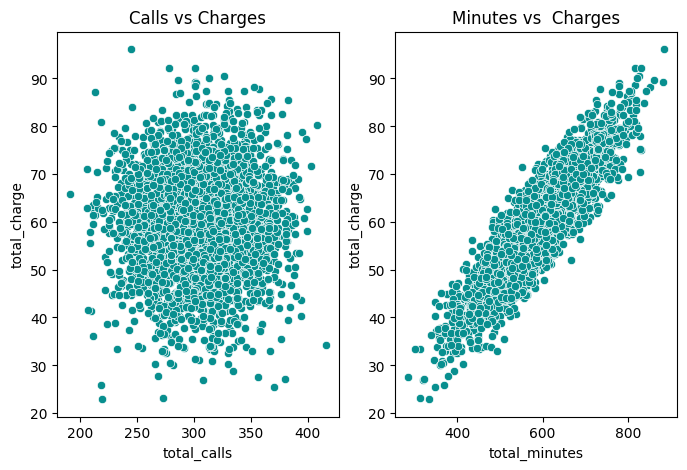

In [32]:
#scatter plot to visualizing 2 numerical variables which are related
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['total_calls'], y=df['total_charge'],color='#088f8f')
plt.title("Calls vs Charges");

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['total_minutes'], y=df['total_charge'],color='#088f8f')
plt.title("Minutes vs  Charges");


- The first scatter plot indicates that number of calls had no effect on charges.
- The second scatter plot, however,shows that longer phone calls minutes however day, evening or night incurred higher charges.



Text(0.5, 1.0, 'Customer service calls vs Churning')

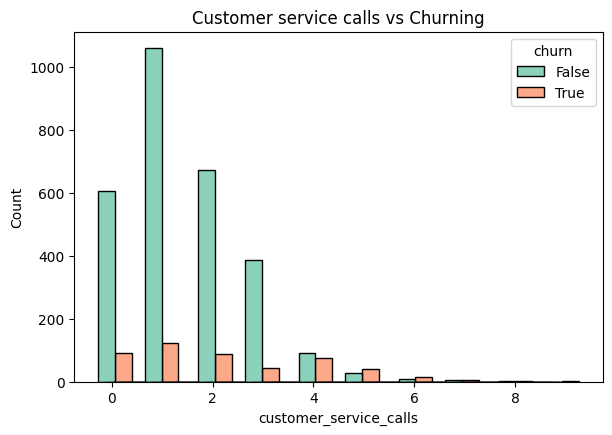

In [33]:
#histogram plots to show distribution of customers service calls and count of churns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['customer_service_calls'],hue=df['churn'], multiple='dodge', palette='Set2',shrink=5)
plt.title('Customer service calls vs Churning')

 - Most customers who churned had contacted customer service more than once

Text(0.5, 1.0, 'total_calls vs Churning')

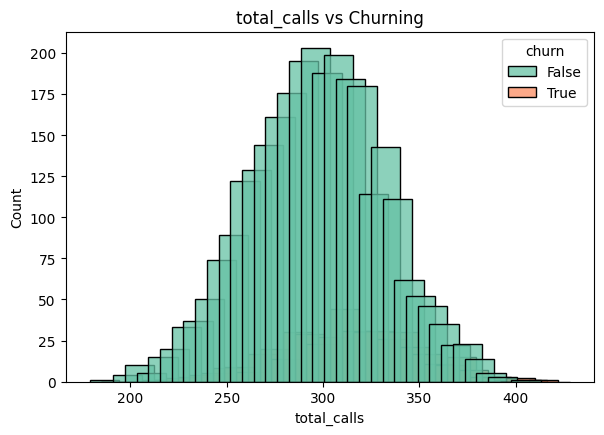

In [34]:
#histogram plots to show distribution of customers service calls and count of churns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['total_calls'],hue=df['churn'], multiple='dodge', palette='Set2',shrink=5)
plt.title('total_calls vs Churning')

- Most customer who churned had the lowest number of calls

Text(0.5, 1.0, 'international plan vs Total calls')

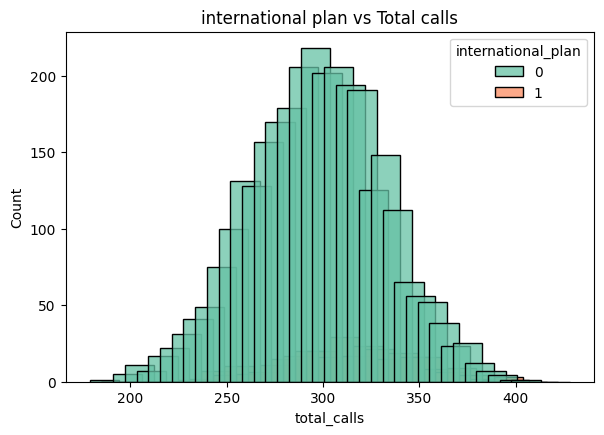

In [36]:
#histogram plots to show distribution of customers service calls and count of churns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['total_calls'],hue=df['international_plan'], multiple='dodge', palette='Set2',shrink=5)
plt.title('international plan vs Total calls')

Text(0.5, 1.0, 'international plan vs churn')

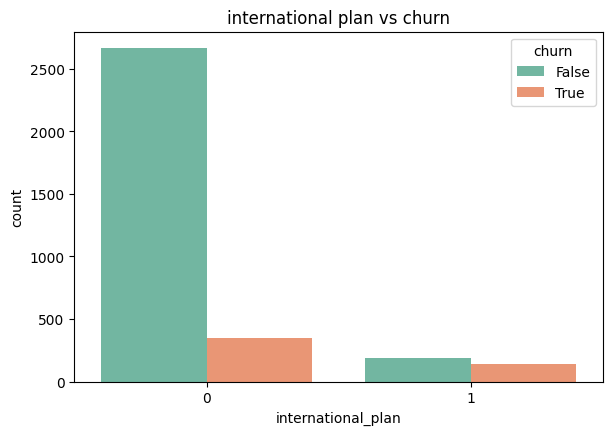

In [37]:
#histogram plots to show distribution of customers with international plan wrt churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=df['international_plan'],hue=df['churn'], palette='Set2')
plt.title('international plan vs churn')

- Majority of customers who had international plan churn, we can conduct a hypothesis test to determine the credibility of this assumption.

**Hypothesis Test**

**Steps for conducting the hypothesis test:**

- State the null hypothesis and the alternative hypothesis
- Choose a signficance level
- Find the p-value
- Reject or fail to reject the null hypothesis

**Hypotheses:**

𝐻0 : Having an international plan has no affect on whether a customer would churn or not

𝐻𝐴 : Having an international plan has an affect on whether a customer would churn or not

**We choose 5% as the significance level and proceed with a two-sample t-test.**

In [64]:
#getting the relavant data
intl1=df[df['international_plan']==1]
intl2=df[df['international_plan']==0]

#Simulating a random sampling
sample_intl1=intl1.sample(n=20, replace = True, random_state=1000)
sample_intl2=intl2.sample(n=20, replace = True, random_state=1000)

#calculating the sample mean()
sample_intl1['international_plan'].mean()
sample_intl2['international_plan'].mean()

# 3. Perform the t-test
stats.ttest_ind(a=sample_intl1['international_plan'], b=sample_intl2['international_plan'], equal_var=False)


TtestResult(statistic=inf, pvalue=0.0, df=1.0)

- The p-value is less than the significance level, we can conclude that it is statistically significant  that having an international plan has an affect on whether a customer would churn or not.

Text(0.5, 1.0, 'voice mail plan vs churn')

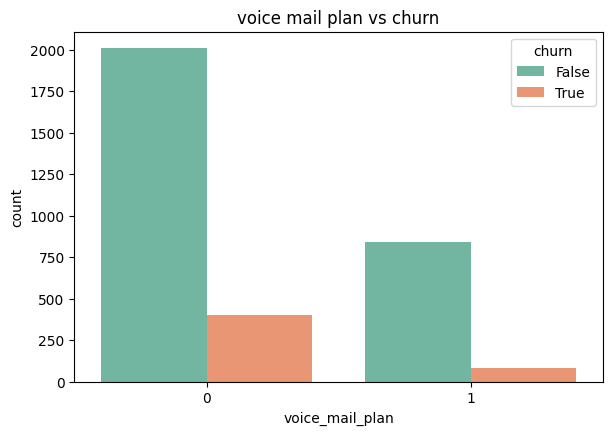

In [38]:
#histogram plots to show distribution of customers with international plan wrt churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=df['voice_mail_plan'],hue=df['churn'], palette='Set2')
plt.title('voice mail plan vs churn')

- Few customers had international plan

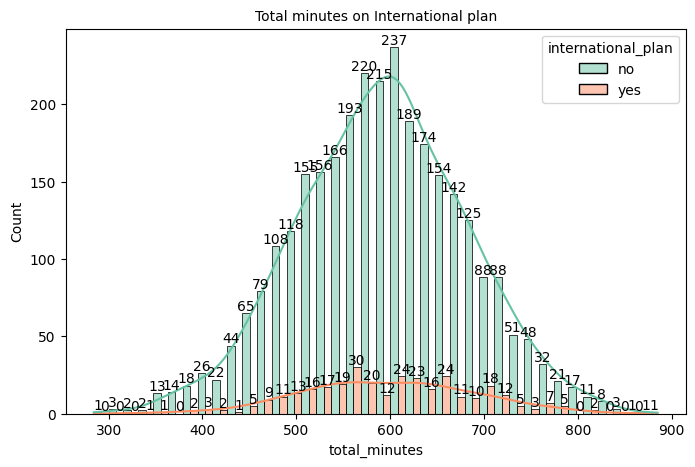

In [38]:
# A histogram to shoe total minutes for customers with international plan;
plt.figure(figsize=(8,5))
x=sns.histplot(data=df, x='total_minutes', hue='international_plan', palette='Set2',multiple='dodge',kde=True)
for i in x.containers:
    x.bar_label(i)
plt.title('Total minutes on International plan', fontsize=10);

- Customer with international plan made shorter minute calls

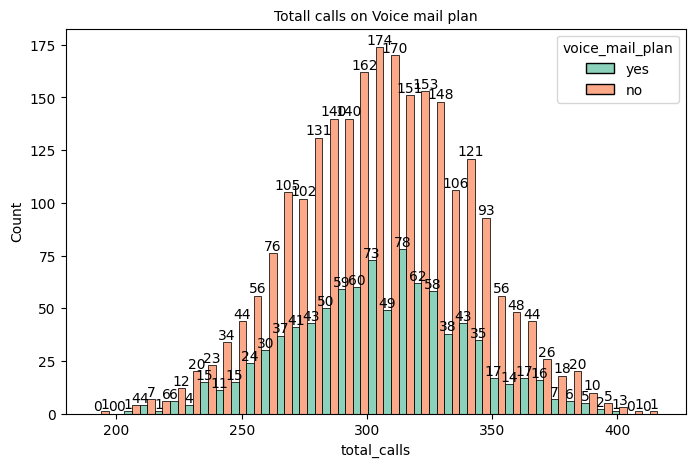

In [39]:
# A histogram to shoe the distribution of total calls on voice mail;
plt.figure(figsize=(8,5))
x=sns.histplot(data=df, x='total_calls', hue='voice_mail_plan', palette='Set2',multiple='dodge')
for i in x.containers:
    x.bar_label(i)
plt.title('Totall calls on Voice mail plan', fontsize=10);

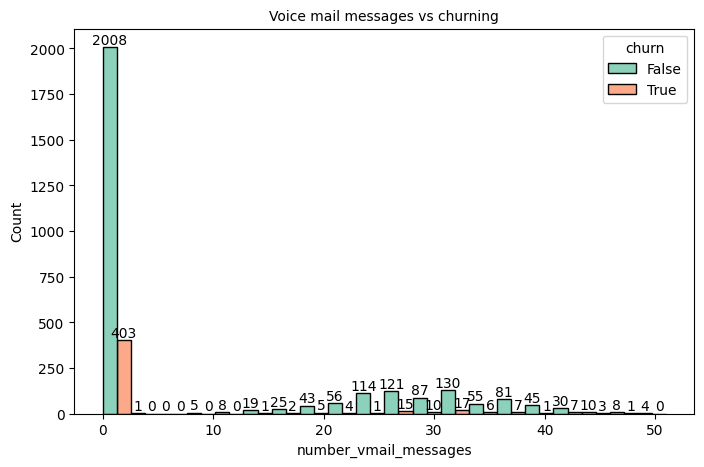

In [40]:
# A histogram to show the distribution of voice mail messages vs churning;
plt.figure(figsize=(8,5))
x=sns.histplot(data=df, x='number_vmail_messages', hue='churn', palette='Set2', multiple='dodge')
for i in x.containers:
    x.bar_label(i)
plt.title('Voice mail messages vs churning', fontsize=10);

- Most customer who churned had the least voice mail messages, this would mean that they were very inactive before churning.

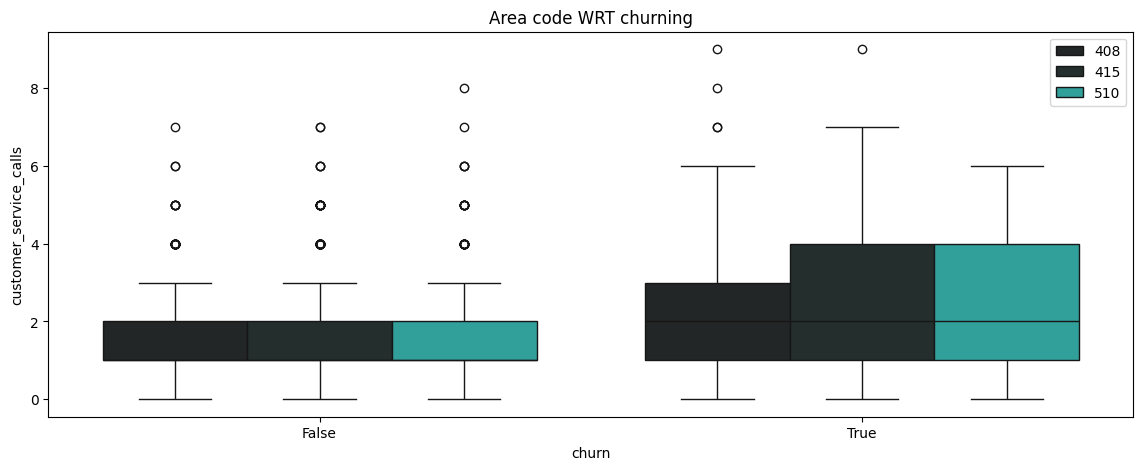

In [82]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer_service_calls',hue='area_code', color='lightseagreen');
plt.title('Area code WRT churning')
plt.legend(loc='upper right');

- Customers who have churned were more likely from  415 or a 510 area code.

<Axes: title={'center': 'No. of Customers by states'}, xlabel='state'>

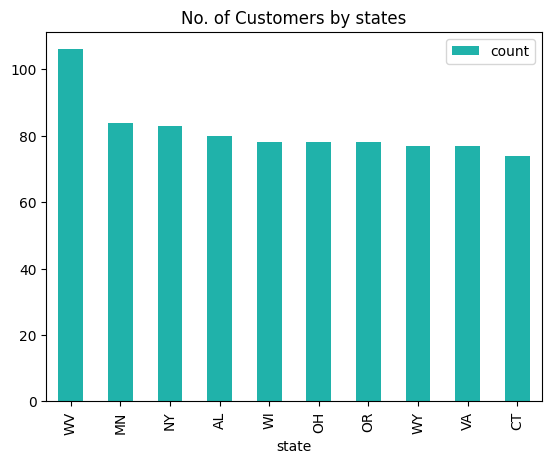

In [80]:
#determining top states with total number of calls
top_10_states = pd.DataFrame(df['state'].value_counts().head(10))
top_10_states.plot(kind='bar', color='lightseagreen',title='No. of Customers by states')

- WV, MN, NY,AL,WI,OH,OR,WY,VA and CT are amongest the top ten states that telecom services were commonly used.



Text(0.5, 1.0, 'Total calls by state')

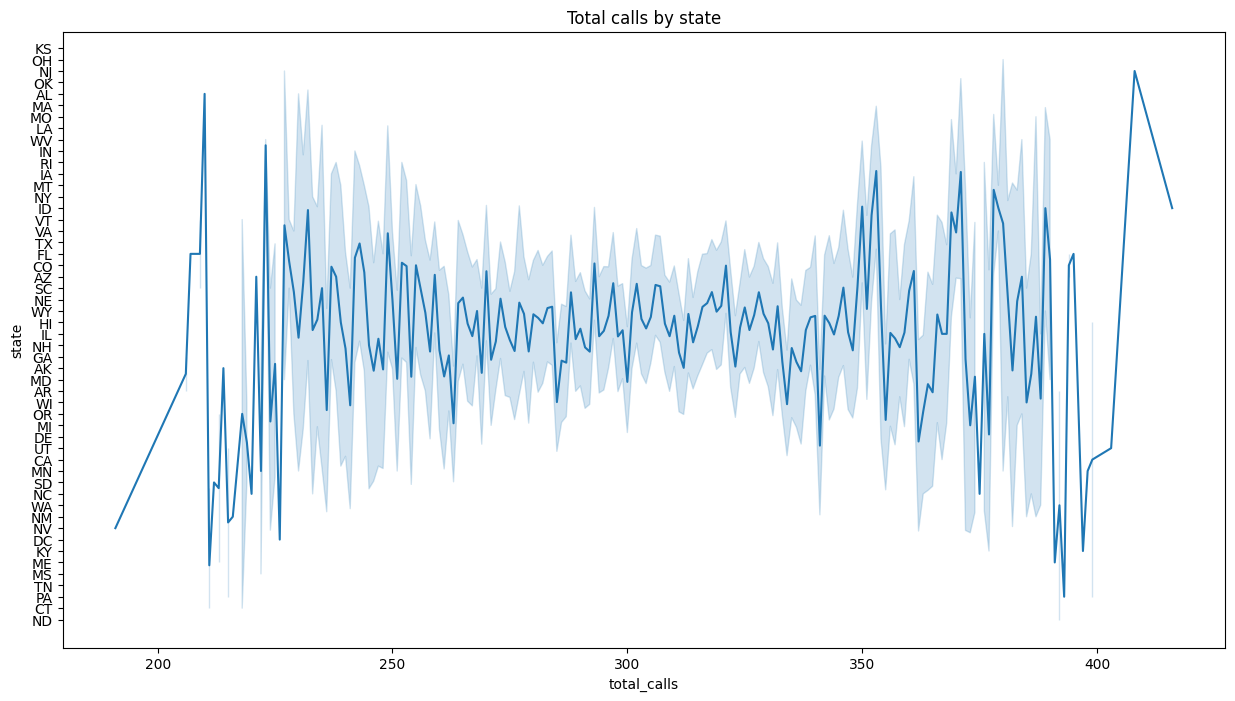

In [54]:
#create a line graph to show total calls with states
plt.figure(figsize=(15,8))
sns.lineplot(x="total_calls", y="state", data=df)
plt.title("Total calls by state")

Text(0.5, 1.0, ' Total calls by area code')

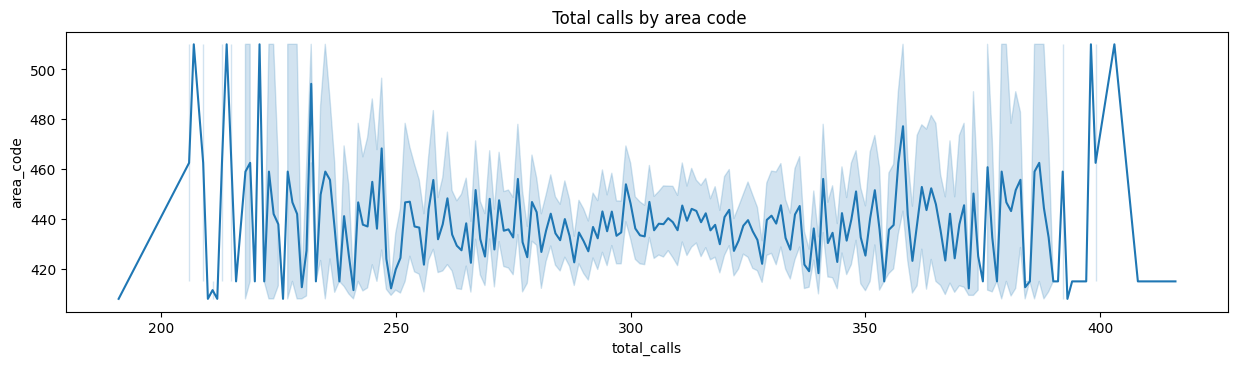

In [53]:
#create a line graph to show total calls with area codes
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
sns.lineplot(x="total_calls", y="area_code", data=df)
plt.title(' Total calls by area code')

Text(0.5, 1.0, 'Total minutes trend wrt state')

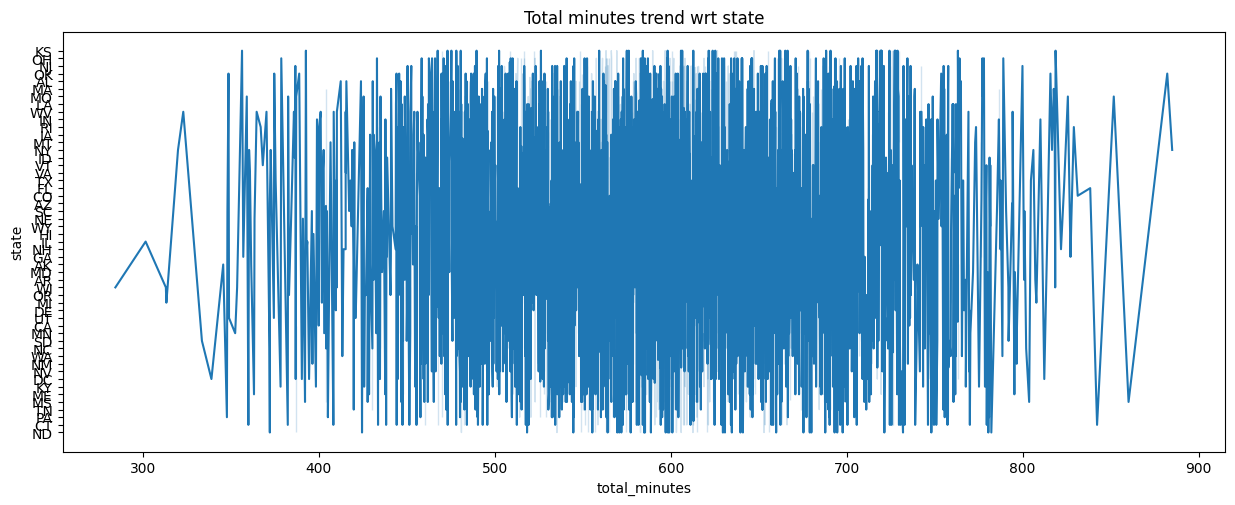

In [47]:
#create a line graph to show total calls with area codes
plt.figure(figsize=(15,12))
plt.subplot(2,1,2)
sns.lineplot(x="total_minutes", y="state", data=df)
plt.title("Total minutes trend wrt state")

- Most states used an average of 450 to 750 talking minutes

**CORRELATION**

- Mosts states made calls between 250-350 in counts.

In [55]:
#defining a correlation matrix
corr_matrix=df[['account_length','number_vmail_messages','total_minutes','total_charge','total_calls','customer_service_calls']]

#Inspecting the columns
corr_matrix.head(5)


,account_length,number_vmail_messages,total_minutes,total_charge,total_calls,customer_service_calls
0,128,25,717.2,75.56,303,1
1,107,26,625.2,59.24,332,1
2,137,0,539.4,62.29,333,0
3,84,0,564.8,66.80,255,2
4,75,0,512.0,52.09,359,3


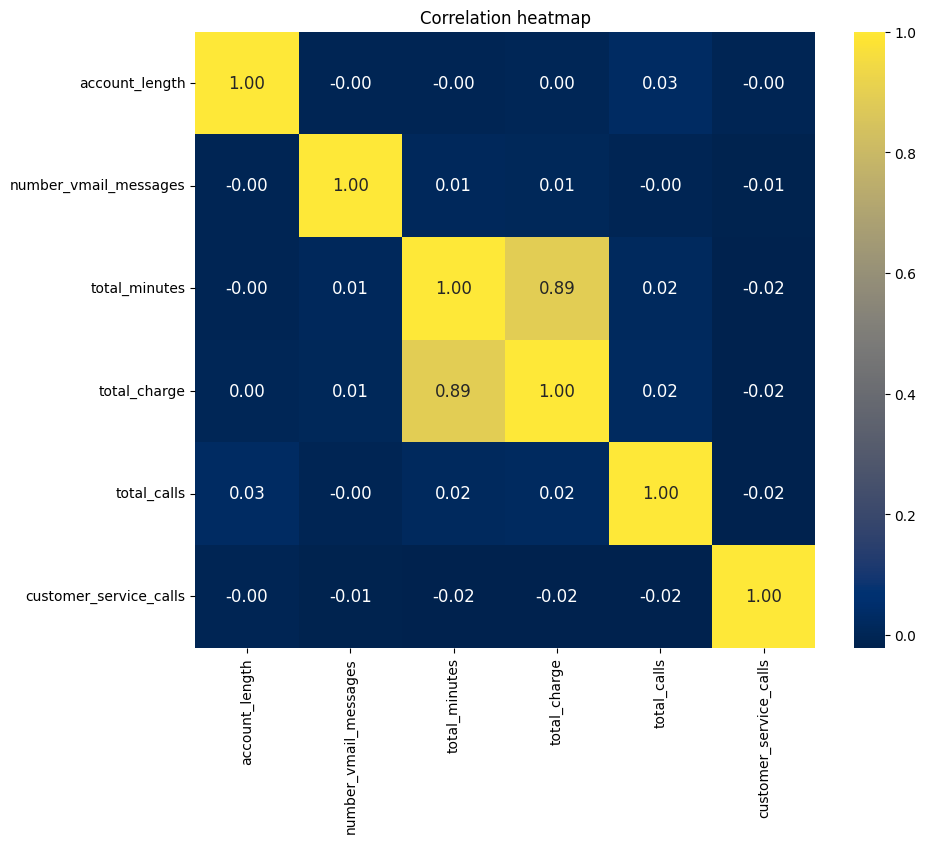

In [56]:
#Plotting a heartmap correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix.corr(), annot=True, cmap='cividis', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation heatmap')
plt.show()

**The correlation shows a negative or no relationship among the variables, which is a good thing as we do not want multicolinearity.**

In [57]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'customer_service_calls', 'churn', 'total_minutes', 'total_charge',
       'total_calls'],
      dtype='object')

**STEP 4: MODEL CONSTRUCTION**

**FEATURE ENGINEERING**

In [65]:
# Checking  class balance
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

- The class of our target variable is split roughly 86/14. In other words, ~14% of the people in this dataset churned.





- We will  calculate how much account length each customer who churns costs the bank by calculating the average length of all customers who churned.

In [66]:
# Calculating average account length of customers who churned
avg_churned_length= df[df['churn']==True]['account_length'].mean()
avg_churned_length

102.66459627329192

- Customer who churned had an account length of 102.7 which is a big length hence a big loss to the company.

**FEATURE SELECTION**

In [67]:
 #Create a new df that drops columns not useful in this case
churn_df = df.drop(['state', 'phone_number'], axis=1)

In [68]:
churn_df.head(4)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge,total_calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255


**FEATURE TRANSFORMATION**

**Encoding churn column which is categorical**

In [71]:
#Label encoding the churn column
label_encoder = LabelEncoder()
churn_df['churn'] = label_encoder.fit_transform(churn_df['churn'])

In [73]:
#Ispecting the class balance in the churn column
churn_df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [62]:
#Converting churn which is categorical to binary
#churn_df['churn'] = churn_df['churn'].map({True: 1, False: 0})

In [74]:
churn_df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [76]:
#Inspecting the change
churn_df.head(4)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge,total_calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,717.2,75.56,303
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,625.2,59.24,332
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,539.4,62.29,333
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,564.8,66.80,255


**SPLITTING THE DATA**

In [77]:
# Isolating the outcome variable
y = churn_df['churn']

# Displaying first few rows of the outcome variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [78]:
# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('churn', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, stratify=y,
                                                    random_state=42)


**MODEL 1:LOGISTIC MODEL**

- Fitting a Logistic regression a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome.

In [79]:
#Fit a LogisticRegression model to the data
logreg = LogisticRegression(solver='liblinear',random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [71]:
y_pred=logreg.predict(X_test)


In [72]:
#Obtain parameter estimates
logreg.coef_

array([[-4.22693244e-04, -5.82331640e-03,  1.94729119e+00,
        -1.70212860e+00,  2.55466313e-02,  5.10343396e-01,
        -1.40775735e-03,  7.14281078e-02, -2.34429678e-03]])

In [73]:
logreg.intercept_

array([-3.02847268])

**Analyzing the results of the resampled model**

In [74]:
print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.862
Precision: 0.568
Recall: 0.207
F1 Score: 0.303


- With reference to F1-score the model is a poor performer.

**Confusion Matrix**

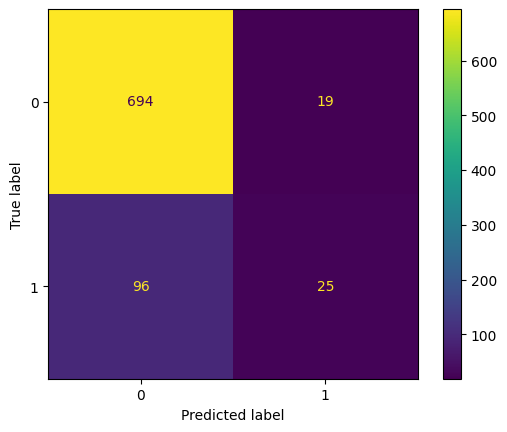

In [75]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = logreg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = logreg.classes_)
disp.plot()


        The upper-left quadrant displays the number of true negatives.-694
        The bottom-left quadrant displays the number of false negatives.-25
        The upper-right quadrant displays the number of false positives-19
        The bottom-right quadrant displays the number of true positives.-96

**Feature scaling**

In [ ]:
#scaling the X_train and X_test
scaler=StandardScaler()

#fitting the scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#Inspecting the X_train scaled
X_train_scaled

array([[ 0.56202094, -0.67787807, -0.32217788, ...,  1.24333581,
         0.66756989, -0.34755432],
       [-0.68908394, -0.67787807, -0.32217788, ..., -1.14327181,
        -1.47088218,  0.99417785],
       [-0.48890716, -0.51087404, -0.32217788, ..., -0.34923766,
        -0.33960929,  1.63587585],
       ...,
       [ 0.11162319, -0.51087404, -0.32217788, ...,  0.86828138,
         1.2283965 , -2.06847166],
       [-0.76415023, -0.67787807, -0.32217788, ...,  1.50688757,
         1.33806071,  1.19835449],
       [-0.51392925, -0.67787807, -0.32217788, ..., -2.22338351,
        -2.5550187 , -0.96008422]])

In [ ]:
#Inspecting the X_test scaled
X_test_scaled

array([[ 2.51374456,  1.7556092 , -0.32217788, ...,  0.54278369,
         0.62716729, -1.10592467],
       [ 1.26263968, -0.51087404, -0.32217788, ...,  1.4167844 ,
         0.97636122, -0.31838622],
       [ 1.0124187 , -0.51087404,  3.10387541, ...,  2.54983172,
         2.02875283, -0.23088195],
       ...,
       [-0.61401764, -0.51087404, -0.32217788, ...,  0.94486907,
         1.50736686,  0.5274884 ],
       [ 0.58704304,  1.7556092 , -0.32217788, ..., -1.1331352 ,
        -0.98797488, -1.57261412],
       [ 0.96237451, -0.51087404, -0.32217788, ..., -2.26280365,
        -1.87394625, -1.13509276]])

In [ ]:
#predicting y on X_test
y_pred_scaled=logreg.predict(X_test)

**Analyzing the model metrics after scaling**

In [ ]:
print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_pred_scaled))
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred_scaled))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred_scaled))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred_scaled))

Accuracy: 0.868
Precision: 0.634
Recall: 0.215
F1 Score: 0.321


- The model accuracy has improved from 68% to 87%

**Confusion matrix after scaling**

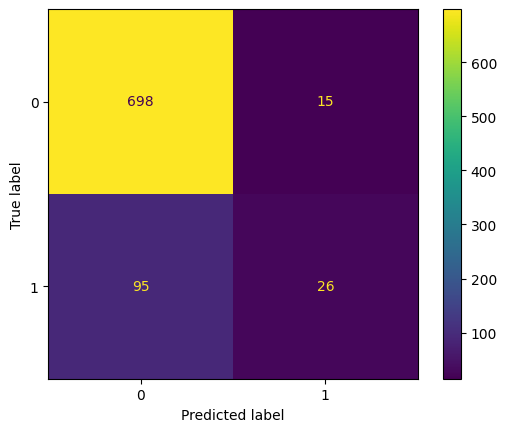

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_scaled, labels = logreg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = logreg.classes_)
disp.plot()

**The model predicts that;**

 - 698 customer are likely not to churn
 ,26 will churn, 15 predicted to churn but did not churn, 95 predicted not to churn but churned.

- Scaling the data did not bring much change but the accuracy improved.

**Next step: fitting a decision tree model to see how it comapres with the logistic**

**MODEL 2: DECISION TREE MODEL**

- A decision tree is non parametric supervised learning algorithm with a tree-like structure that represents a series of decisions.

In [ ]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)
dt_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [ ]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.918
Precision: 0.723
Recall: 0.711
F1 Score: 0.717


- A comparison of F1 scores reveals that the decision tree is an improvement to the Logistic model

**Analyzing the results in a Confusion Matrix**

In [ ]:
dt_predicted=decision_tree.predict(X_test)
cm=confusion_matrix(y_test, dt_predicted, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=decision_tree.classes_)
disp

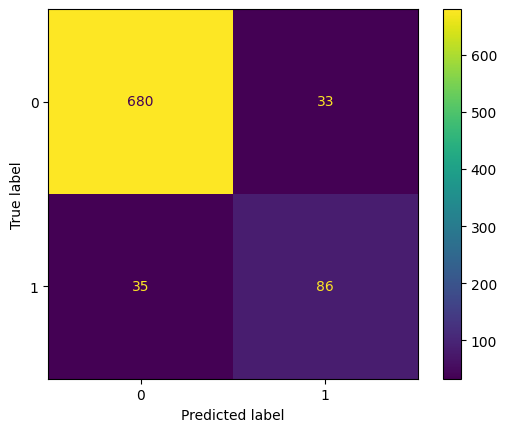

In [ ]:
#Displaying the matrix
disp.plot(values_format='')
plt.show()


- From this confusion matrix that the model correctly predicts many true negatives.  
- It appears slightly more likely to predict a false positive than a false negative.

- The decision tree model also predicts lesser false positive. i.e (from 95 to 35)


**PLOTTING THE TREE**

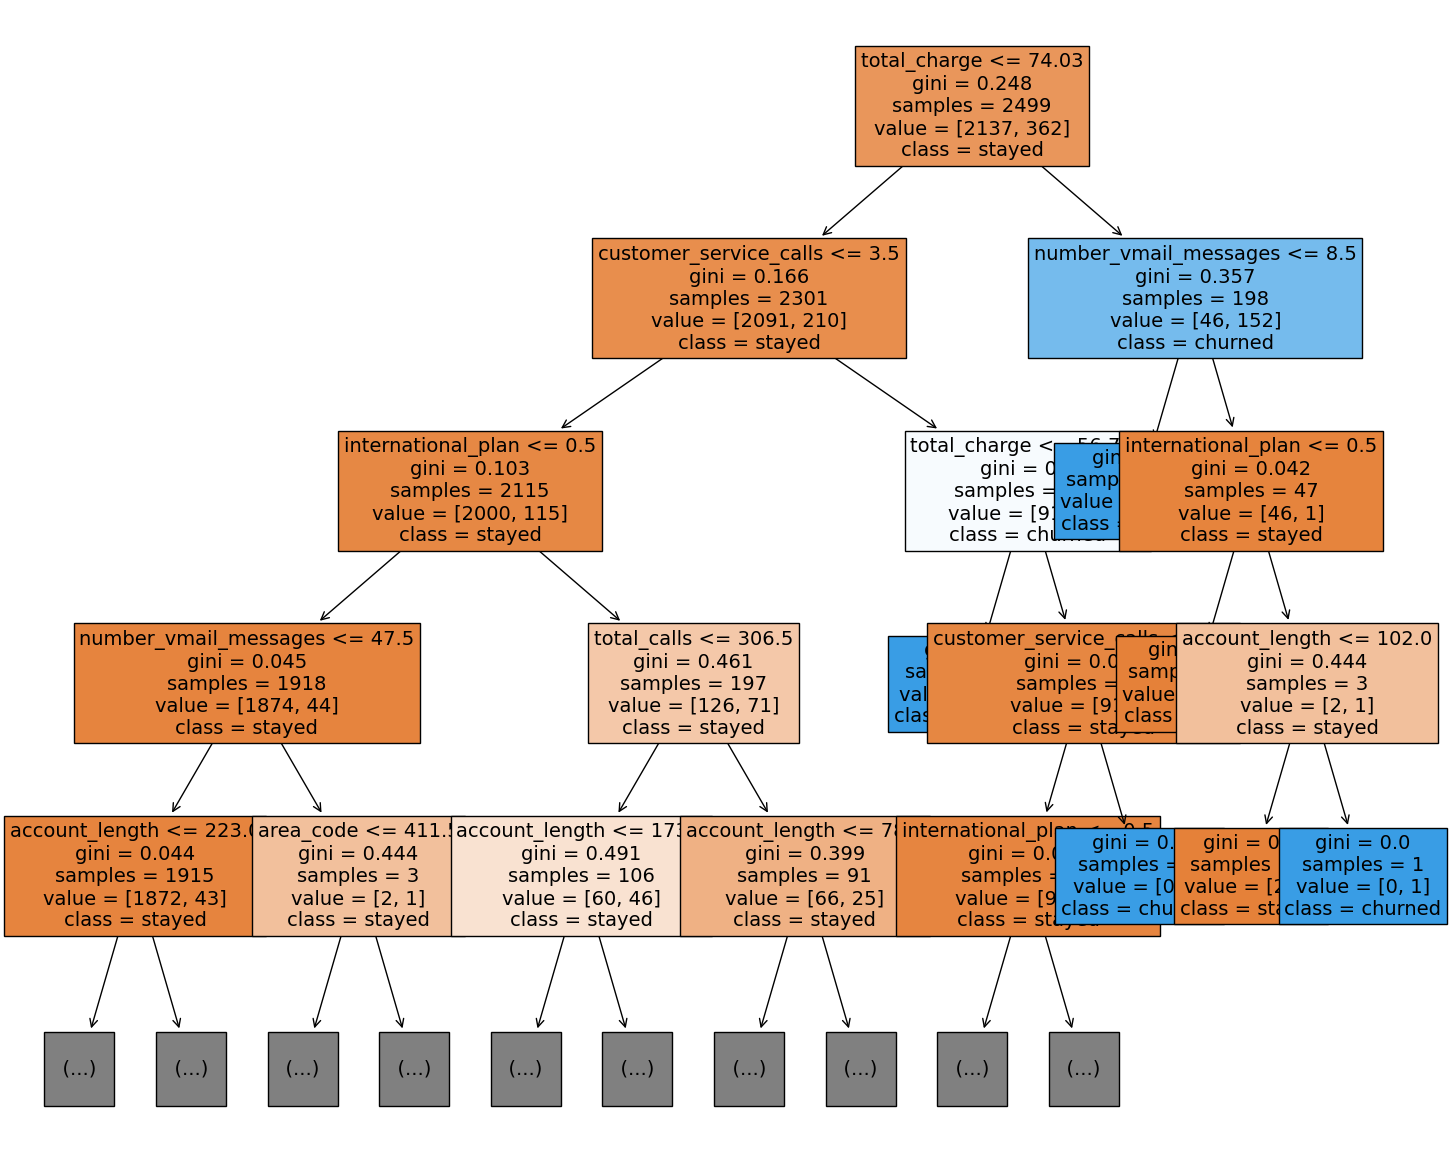

In [ ]:
# Plot the tree
plt.figure(figsize=(18,15))
plot_tree(decision_tree, max_depth=4, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

**TUNING AND VALIATING THE DECISION TREEE MODEL**

**Using GridSearchCV to tune the following hyperparameters with cross-validation:**

    max_depth
    min_samples_leaf

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

In [ ]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [ ]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

In [ ]:
%%time
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree,
                   tree_para,
                   scoring = scoring,
                   cv=5,
                   refit="accuracy")

# Fit the model
clf.fit(X_train, y_train)

CPU times: user 6.44 s, sys: 15.5 ms, total: 6.46 s
Wall time: 6.48 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='accuracy',
             scoring={'recall', 'accuracy', 'f1', 'precision'})

In [ ]:
# Examine the best model from GridSearch
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=42)

In [ ]:
clf.best_score_

0.9475767535070139

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
# Call the function on our model
result_table = make_results("Tuned Decision Tree", clf)

In [ ]:
# View the results
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.789094,0.676903,0.947069,0.947577


- The results show that our model's performance is great, but maybe another kind of model will do better

**MODEL 3: RANDOM FOREST MODEL**

A random forest is a group of decision tree where the ensemble method combines the results of the trees. Here I'm fitting a RF to see how it compares with other models.

In [ ]:
# Instantiate the model and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
# Training accuracy score
forest.score(X_train, y_train)

0.9519807923169268

In [ ]:
# Test accuracy score
forest.score(X_test, y_test)

0.9448441247002398

In [ ]:
# Determine set of hyperparameters.

cv_params = {'n_estimators' : [50,100],
              'max_depth' : [10,50],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"],
              'max_samples' : [.5,.9]}

In [ ]:
# Search over specified parameters

rf_val = GridSearchCV(forest, cv_params, cv=5, refit='f1')
rf_val

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1')

In [ ]:
# Fit the model.
rf_val.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1')

In [ ]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 100}

**Result and Evaluation of RF Model**

In [ ]:
#Obtaining performance score for the random forest model
print("The precision score is {pc:.3f}".format(pc = precision_score(y_test, y_pred)))
print("The recall score is {rc:.3f}".format(rc = recall_score(y_test, y_pred)))
print("The accuracy score is {ac:.3f}".format(ac = accuracy_score(y_test, y_pred)))
print("The F1 score is {f1:.3f}".format(f1 = f1_score(y_test, y_pred)))

The precision score is 0.634
The recall score is 0.215
The accuracy score is 0.868
The F1 score is 0.321


- Random forest model  has low scores on F1-score and recal score.

**MODEL:5 XGBOOST MODEL**

**Building an XGBoost Model**

In [ ]:
#Importing the xgboot package
from xgboost import XGBClassifier

# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [ ]:
# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy ))
print('Validation accuracy: {:.4}%'.format(test_accuracy ))

Training Accuracy: 1.0%
Validation accuracy: 0.9365%


- The model accuracy of 100% could sugges an overfitting

**Hyperparameter tuning**

- In order to prevent overfitting we tune the model.

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))



Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7


In [ ]:
# Accuracy of training and test sets
training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 99.84%
Validation accuracy: 93.53%


**MODEL 6:NAIVE BAYES MODEL**

- The Naive Bayes classifier is a supervised machine learning algorithm that is used for classification tasks

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [ ]:
#Obtaining the model performance
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.857
Precision: 0.508
Recall: 0.545
F1 Score: 0.526


In [ ]:
# Check unique values in predictions
np.unique(y_preds)

array([0, 1])

- The model predicts both the possibilites of churning and not churning

**Confusion Matrix**

In [ ]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Return a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )

    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

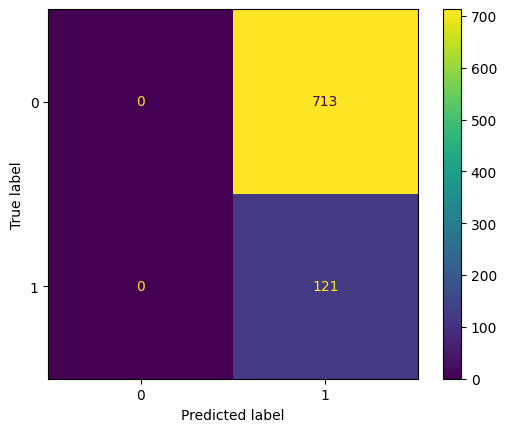

In [ ]:
conf_matrix_plot(gnb, X_test, y_test)

- This confusion matrix indicates that no true positives were predicted.

- Naive Bayes did not work well.

**Scaling the data**

In [ ]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [ ]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [ ]:
#Obtaining the performances of the scaled parameters
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.857
Precision: 0.508
Recall: 0.545
F1 Score: 0.526


- Scaling has no much effect on the model

In [ ]:
scaled_preds = gnb_scaled.predict(X_test)
cm=confusion_matrix(y_test, scaled_preds, labels=gnb_scaled.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=gnb_scaled.classes_)
disp

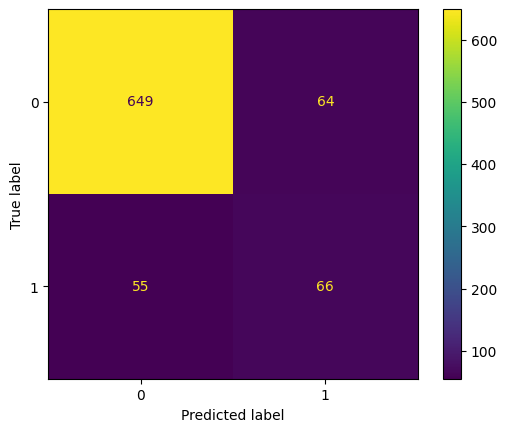

In [ ]:
disp.plot(values_format='') # `values_format=''` suppresses scientific notation
plt.show()

- After fitting the 5th model, we conclude that the tuned decision tree model gave better prediction metrics.

**MODEL SCORE EVALUATION**

In [ ]:
# import module
from tabulate import tabulate

# assigning metrics for logistic model
mydata = [['F1', '0.868'],
          ['Recall',' 0.634'],
          ['Precision', '0.214'],
          ['Accuracy','0.320']]

# header
head = ["Model", "Tuned logistic Model"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------+------------------------+
| Model     |   Tuned logistic Model |
+===========+========================+
| F1        |                  0.868 |
+-----------+------------------------+
| Recall    |                  0.634 |
+-----------+------------------------+
| Precision |                  0.214 |
+-----------+------------------------+
| Accuracy  |                  0.32  |
+-----------+------------------------+


In [ ]:
# assign metrics for Decision tree
mydata = [['F1', '0.945'],
          ['Recall',' 0.935'],
          ['Precision', '0.955'],
          ['Accuracy','0.940']]

# create header
head = ["Model", "Decision Tree"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------+-----------------------+
| Model     |   Tuned Decision Tree |
+===========+=======================+
| F1        |                 0.945 |
+-----------+-----------------------+
| Recall    |                 0.935 |
+-----------+-----------------------+
| Precision |                 0.955 |
+-----------+-----------------------+
| Accuracy  |                 0.94  |
+-----------+-----------------------+


In [ ]:
# assigning metrics Randon forest
mydata =[['F1','0.321'],
        ['Recall','0.215'],
        ['Precision', '0.634'],
        ['Accuracy', '0.868']]

# create header
head = ["Model", "Tuned Random Forest"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------+-----------------------+
| Model     |   Tuned Random Forest |
+===========+=======================+
| F1        |                 0.321 |
+-----------+-----------------------+
| Recall    |                 0.215 |
+-----------+-----------------------+
| Precision |                 0.634 |
+-----------+-----------------------+
| Accuracy  |                 0.868 |
+-----------+-----------------------+


In [ ]:
# assigning metrics Randon forest
mydata =[['F1','0.526'],
        ['Recall','0.545'],
        ['Precision', '0.508'],
        ['Accuracy', '0.857']]

# create header
head = ["Model", "Naive Bayes"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------+---------------+
| Model     |   Naive Bayes |
+===========+===============+
| F1        |         0.526 |
+-----------+---------------+
| Recall    |         0.545 |
+-----------+---------------+
| Precision |         0.508 |
+-----------+---------------+
| Accuracy  |         0.857 |
+-----------+---------------+


**FINDINGS**

- Decision tree model was the best to predict churning among customers in this analysis.
- The classification metrics  of the model were: Accuracy-94%,Precision-95%, Recall-94% and F1-Score-95%.

**RECOMMENDATION**

- I would recommend that Syria Tel Company should use large datasets to test the performance model.

- Syria Tel company can do product development more frequently to keep up with the consistent change in customer taste.

- Add more enticing features to products according to daily trends in fashion,music, entertainment,sports,holidays.

- Invest more on advertising to maintain awareness amongst it's customers ang even gain new ones.

- Take customer service seriously, analyze daily calls and ensure all reported issues are resolve in a timerly manner. This is because the analysis showed, most customers who churn, had contacted the Customer service more that once.

- Reduce charges on minute rate to prevent the 19% of customers who churned due to charges incurred from churning.